<a href="https://colab.research.google.com/github/karaage0703/covid19_memo/blob/master/covid19_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 新型コロナウイルスの感染状況を分析するためのノートブック

データを可視化するために、個人的に作成しているものです。

内容の正確性を保証するものではありませんので、ご注意下さい。


以下リポジトリでPR受付中です。

https://github.com/karaage0703/covid19_memo

## データのダウンロード

以下のオープンデータを使用（Google Spread Sheet)

https://docs.google.com/spreadsheets/d/1jfB4muWkzKTR0daklmf8D5F0Uf_IYAgcx_-Ij9McClQ/edit#gid=0

In [0]:
!wget --no-check-certificate --output-document=covid19jp.csv 'https://docs.google.com/spreadsheets/d/1jfB4muWkzKTR0daklmf8D5F0Uf_IYAgcx_-Ij9McClQ/export?gid=0&format=csv'

--2020-03-06 01:32:54--  https://docs.google.com/spreadsheets/d/1jfB4muWkzKTR0daklmf8D5F0Uf_IYAgcx_-Ij9McClQ/export?gid=0&format=csv
Resolving docs.google.com (docs.google.com)... 172.217.212.102, 172.217.212.100, 172.217.212.101, ...
Connecting to docs.google.com (docs.google.com)|172.217.212.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘covid19jp.csv’

covid19jp.csv           [ <=>                ]  65.17K  --.-KB/s    in 0.001s  

2020-03-06 01:32:54 (50.5 MB/s) - ‘covid19jp.csv’ saved [66739]



## データ読み込みと確認

データをpandasを使って読み込み、内容を確認する

pandasで読み込む

In [0]:
import pandas as pd
data = pd.read_csv('covid19jp.csv')

データが読み込めているか確認

In [0]:
data.head()

,Patient Number,Date Announced,Date Added,Age Bracket,Gender,"Residence City, Prefecture",Detected City,Detected Prefecture,Status,Click Here For Sheet Information,Notes,Source(s),Related Patients,MHLW (New) Patient Number,MHLW (Orig) Patient Number,Hokkaido Patient Number,Tokyo Patient Number,Osaka Patient Number,Charter Flight Passenger,Cruise Passenger (Disembarked),Cruise Passenger (Infected Onboard),Cruise Quarantine Officer
0,1.0,2020-01-30,2020-01-30,50,M,"Wuhan, China",NaN,Unspecified,Discharged,NaN,Japanese lives in China,https://www.mhlw.go.jp/stf/newpage_09531.html,NaN,NaN,9.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,2.0,2020-02-01,2020-02-01,40,M,Unspecified,NaN,Unspecified,Discharged,NaN,NaN,https://www.mhlw.go.jp/stf/newpage_09531.html,3,NaN,14.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,3.0,2020-02-01,2020-02-01,40,M,China,NaN,Unspecified,Discharged,NaN,Japanese lives in China,https://www.mhlw.go.jp/stf/newpage_09531.html,2,NaN,15.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,4.0,2020-02-01,2020-02-01,40,M,"Wuhan, China",NaN,Unspecified,Discharged,NaN,Japanese lives in China,https://www.mhlw.go.jp/stf/newpage_09531.html,NaN,NaN,16.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,5.0,2020-02-04,2020-02-04,50,F,Chiba,NaN,Unspecified,Discharged,NaN,NaN,https://www.mhlw.go.jp/stf/newpage_09531.html,NaN,NaN,18.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN


データのチェック

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 22 columns):
Patient Number                         354 non-null float64
Date Announced                         359 non-null object
Date Added                             359 non-null object
Age Bracket                            350 non-null object
Gender                                 352 non-null object
Residence City, Prefecture             317 non-null object
Detected City                          235 non-null object
Detected Prefecture                    358 non-null object
Status                                 157 non-null object
Click Here For Sheet Information       0 non-null float64
Notes                                  192 non-null object
Source(s)                              333 non-null object
Related Patients                       90 non-null object
MHLW (New) Patient Number              237 non-null object
MHLW (Orig) Patient Number             286 non-null float64
Hokkaido P

欠損値のチェック

In [0]:
data.isna().sum()

Patient Number                          18
Date Announced                          13
Date Added                              13
Age Bracket                             22
Gender                                  20
Residence City, Prefecture              55
Detected City                          137
Detected Prefecture                     14
Status                                 215
Click Here For Sheet Information       372
Notes                                  180
Source(s)                               39
Related Patients                       282
MHLW (New) Patient Number              135
MHLW (Orig) Patient Number              86
Hokkaido Patient Number                290
Tokyo Patient Number                   342
Osaka Patient Number                   359
Charter Flight Passenger               358
Cruise Passenger (Disembarked)         367
Cruise Passenger (Infected Onboard)    367
Cruise Quarantine Officer              363
dtype: int64

愛知県に住んでいる人を抽出

In [0]:
aichi_data = data[(data['Detected Prefecture'] == 'Aichi')]
aichi_data.head()

,Patient Number,Date Announced,Date Added,Age Bracket,Gender,"Residence City, Prefecture",Detected City,Detected Prefecture,Status,Click Here For Sheet Information,Notes,Source(s),Related Patients,MHLW (New) Patient Number,MHLW (Orig) Patient Number,Hokkaido Patient Number,Tokyo Patient Number,Osaka Patient Number,Charter Flight Passenger,Cruise Passenger (Disembarked),Cruise Passenger (Infected Onboard),Cruise Quarantine Officer
17,18.0,2020-01-26,2020-01-26,40,M,"Wuhan, China",NaN,Aichi,NaN,NaN,Chinese traveler,https://www.mhlw.go.jp/stf/newpage_09531.html,28,4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,19.0,2020-01-28,2020-01-28,40,M,"Wuhan, China",NaN,Aichi,Hospitalized,NaN,Chinese traveler,https://www.mhlw.go.jp/stf/newpage_09531.html,NaN,5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,40.0,2020-02-14,2020-02-14,60,M,"Nagoya, Aichi",NaN,Aichi,NaN,NaN,NaN,https://www.mhlw.go.jp/stf/newpage_09539.html,NaN,26,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,48.0,2020-02-15,2020-02-15,60,F,Aichi,Nagoya,Aichi,NaN,NaN,NaN,https://www.mhlw.go.jp/stf/newpage_09545.html,35,34,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,49.0,2020-02-16,2020-02-16,60,M,Aichi,NaN,Aichi,NaN,NaN,NaN,https://www.mhlw.go.jp/content/10906000/000596...,42,35,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


データのチェック

In [0]:
aichi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 17 to 353
Data columns (total 22 columns):
Patient Number                         58 non-null float64
Date Announced                         58 non-null object
Date Added                             58 non-null object
Age Bracket                            51 non-null object
Gender                                 51 non-null object
Residence City, Prefecture             49 non-null object
Detected City                          46 non-null object
Detected Prefecture                    58 non-null object
Status                                 14 non-null object
Click Here For Sheet Information       0 non-null float64
Notes                                  4 non-null object
Source(s)                              54 non-null object
Related Patients                       19 non-null object
MHLW (New) Patient Number              32 non-null object
MHLW (Orig) Patient Number             42 non-null float64
Hokkaido Patient Number 

欠損値のチェック

In [0]:
aichi_data.isna().sum()

Patient Number                          0
Date Announced                          0
Date Added                              0
Age Bracket                             7
Gender                                  7
Residence City, Prefecture              9
Detected City                          12
Detected Prefecture                     0
Status                                 44
Click Here For Sheet Information       58
Notes                                  54
Source(s)                               4
Related Patients                       39
MHLW (New) Patient Number              26
MHLW (Orig) Patient Number             16
Hokkaido Patient Number                58
Tokyo Patient Number                   58
Osaka Patient Number                   58
Charter Flight Passenger               58
Cruise Passenger (Disembarked)         58
Cruise Passenger (Infected Onboard)    58
Cruise Quarantine Officer              58
dtype: int64

## 感染者数の分析
### 準備

matplotlibをインポート






In [0]:
import matplotlib.pyplot as plt

### 年齢別のヒストグラム

- データを読み込む
- 欠損値を除去
- int型に変換
- ヒストグラムの表示

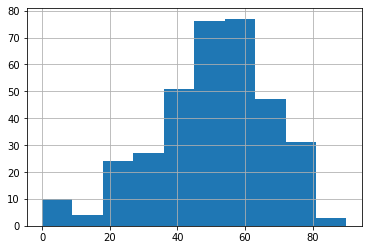

In [0]:
temp_data = data['Age Bracket']
temp_data = temp_data.replace(['Unspecified', 'NaN'])
temp_data = temp_data.dropna(how='all')
temp_data = temp_data.astype('int64')
temp_data.hist()

愛知の場合

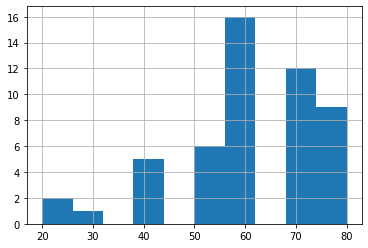

In [0]:
temp_data = aichi_data['Age Bracket']
temp_data = temp_data.replace(['Unspecified', 'NaN'])
temp_data = temp_data.dropna(how='all')
temp_data = temp_data.astype('int64')
temp_data.hist()

### 性別の割合

全国のデータ

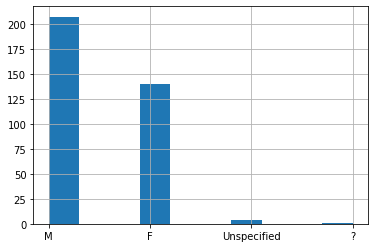

In [0]:
temp_data = data['Gender']
temp_data = temp_data.dropna(how='all')
temp_data.hist()

愛知の場合

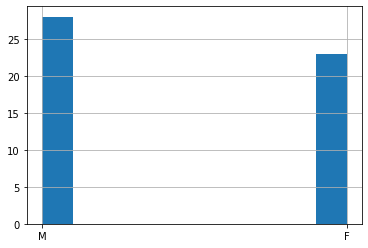

In [0]:
temp_data = aichi_data['Gender']
temp_data = temp_data.dropna(how='all')
temp_data.hist()

#### 陽性患者数（1日当たりの増加数）
全国

<BarContainer object of 37 artists>

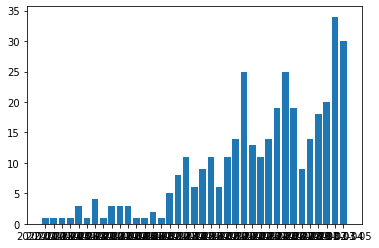

In [0]:
temp_data = data.groupby('Date Announced')['Status'].apply(len)
plt.bar(temp_data.index, temp_data, linewidth=0)

愛知

<BarContainer object of 20 artists>

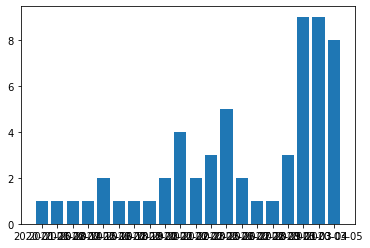

In [0]:
temp_data = aichi_data.groupby('Date Announced')['Status'].apply(len)
plt.bar(temp_data.index, temp_data, linewidth=0)

# References

- https://www.kaggle.com/imdevskp/covid-19-analysis-viz-prediction-comparisons
- https://pythondatascience.plavox.info/matplotlib/%E6%A3%92%E3%82%B0%E3%83%A9%E3%83%95